In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/20.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/6.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/5.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/8.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/30.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/38.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/33.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/10.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/35.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/9.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/37.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/1.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/29.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/16.jpg
/kaggle/input/cotton-leaf-disease-datas

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
import random

In [3]:
# Dataset paths
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Dataset Paths
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load Images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="sparse",  # Use sparse labels for SMOTE compatibility
    shuffle=True
)

# Extract Class Labels from the Generator
X_images = []
y_labels = []

for _ in range(len(train_generator)):
    images, labels = next(train_generator)
    X_images.extend(images)
    y_labels.extend(labels)

X_images = np.array(X_images)
y_labels = np.array(y_labels, dtype=int)  # Ensure integer labels for SMOTE

# Print Class Distribution Before SMOTE
print("Class Distribution Before SMOTE:", Counter(y_labels))

# Feature Extraction using InceptionResNetV2
base_model = InceptionResNetV2(weights="imagenet", include_top=False, pooling="avg")
feature_model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract Features from Images
X_features = feature_model.predict(X_images)
print(f"Feature shape: {X_features.shape}")

# Apply SMOTE Before Splitting
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_smote, y_smote = smote.fit_resample(X_features, y_labels)

# Print Class Distribution After SMOTE
print("Class Distribution After SMOTE:", Counter(y_smote))

# Split Dataset After SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Print Final Class Distribution
print("Class Distribution in Training Set:", Counter(y_train))
print("Class Distribution in Testing Set:", Counter(y_test))

# Save Processed Data (Optional)
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("SMOTE Applied Successfully and Dataset Split Completed!")


Found 2400 images belonging to 6 classes.
Class Distribution Before SMOTE: Counter({5: 400, 1: 400, 4: 400, 0: 400, 2: 400, 3: 400})
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step
Feature shape: (2400, 1536)
Class Distribution After SMOTE: Counter({5: 400, 1: 400, 4: 400, 0: 400, 2: 400, 3: 400})
Class Distribution in Training Set: Counter({3: 320, 2: 320, 5: 320, 0: 320, 4: 320, 1: 320})
Class Distribution in Testing Set: Counter({4: 80, 5: 80, 2: 80, 3: 80, 0: 80, 1: 80})
SMOTE Applied Successfully and Dataset Split Completed!


(32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


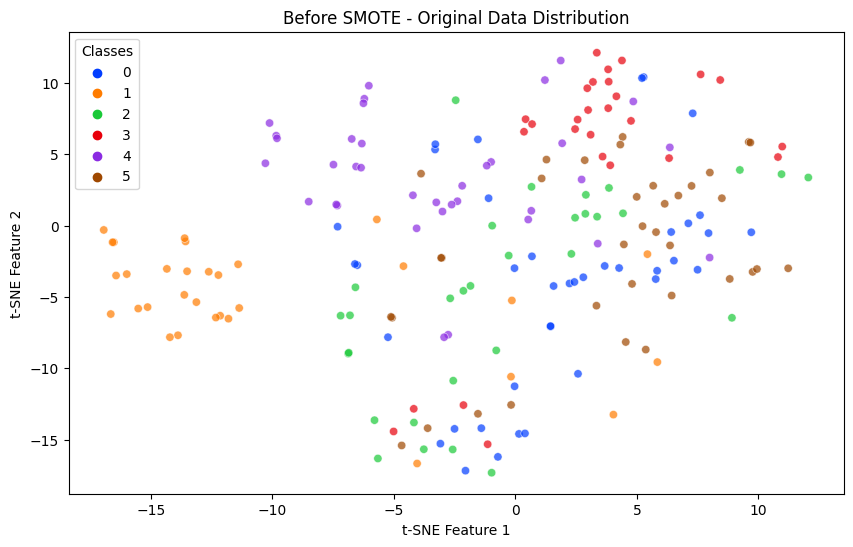

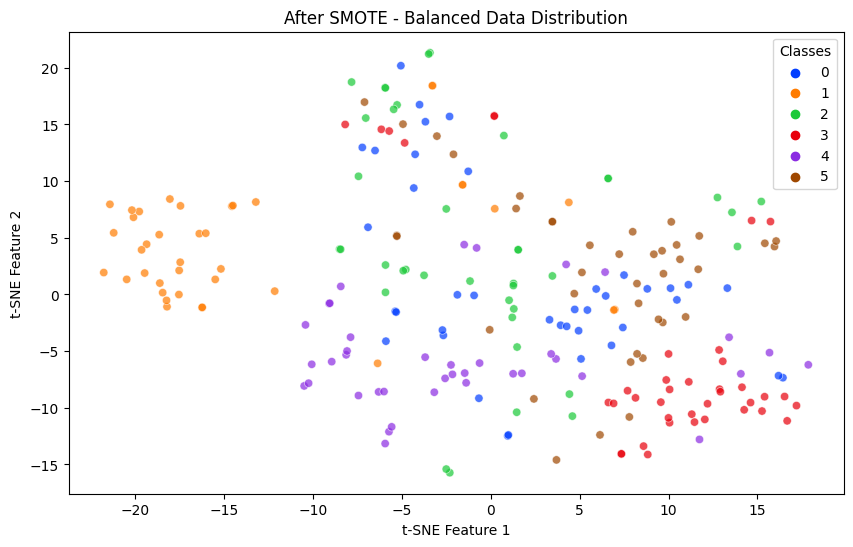

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder

# Load the pre-trained InceptionResNetV2 model without the top layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features using InceptionResNetV2
def extract_features_from_generator(generator, model, num_samples=200):
    features = []
    labels = []
    count = 0
    
    for images, lbls in generator:
        batch_features = model.predict(images)
        features.extend(batch_features)

        # If labels are sparse (1D integers), directly append them
        labels.extend(lbls)  # No need for np.argmax()
        
        count += len(images)
        if count >= num_samples:
            break
    
    return np.array(features[:num_samples]), np.array(labels[:num_samples], dtype=int)
for images, lbls in train_generator:
    print(lbls.shape)  # Should print (batch_size,) if sparse
    break


# Extract features from train_generator
X, y = extract_features_from_generator(train_generator, base_model, num_samples=200)

# Use t-SNE to reduce features to 2D before SMOTE
tsne = TSNE(n_components=2, random_state=42)
X_tsne_before = tsne.fit_transform(X)

# Apply SMOTE for data balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Use t-SNE to reduce features to 2D after SMOTE
X_tsne_after = tsne.fit_transform(X_resampled)

# Plot Before SMOTE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_before[:, 0], y=X_tsne_before[:, 1], hue=y, palette='bright', alpha=0.7)
plt.title("Before SMOTE - Original Data Distribution")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Classes")
plt.show()

# Plot After SMOTE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_after[:, 0], y=X_tsne_after[:, 1], hue=y_resampled, palette='bright', alpha=0.7)
plt.title("After SMOTE - Balanced Data Distribution")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Classes")
plt.show()


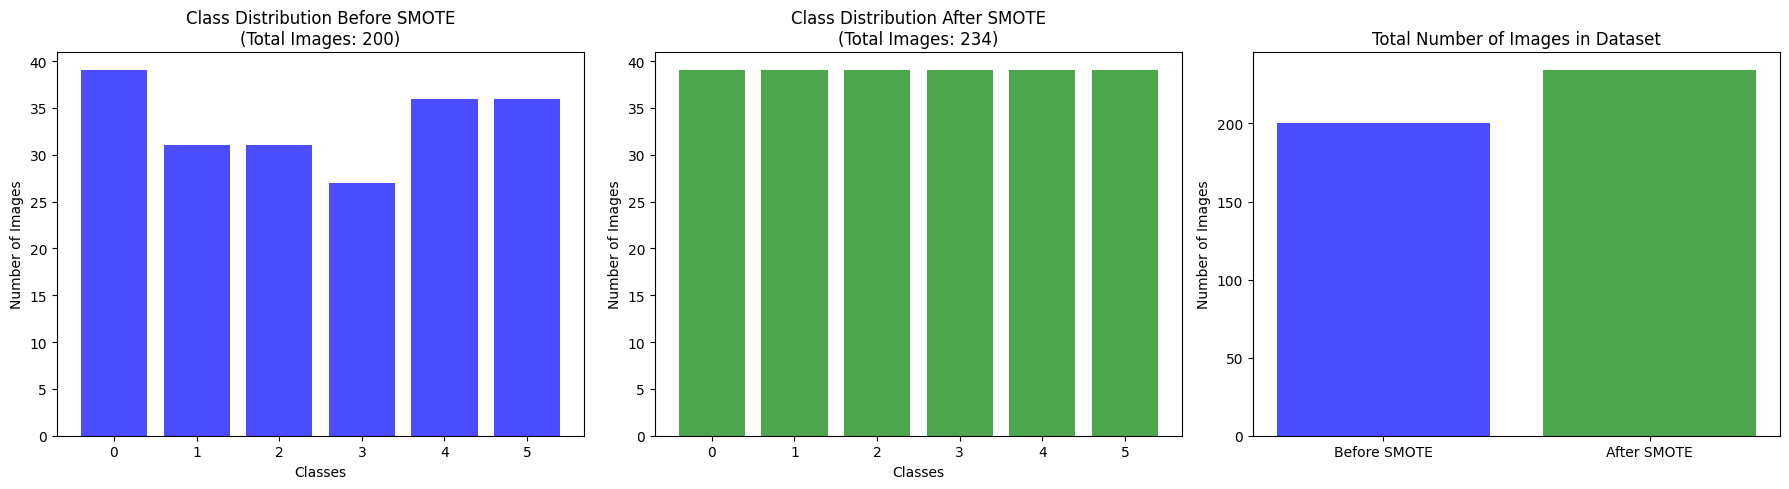

In [6]:
from collections import Counter

# Count class distribution before SMOTE
class_counts_before = Counter(y)

# Count class distribution after SMOTE
class_counts_after = Counter(y_resampled)

# Extract class labels and counts for plotting
classes = sorted(class_counts_before.keys())  # Ensure classes are in order
counts_before = [class_counts_before[c] for c in classes]
counts_after = [class_counts_after[c] for c in classes]

# Calculate total number of images before and after SMOTE
total_images_before = sum(counts_before)
total_images_after = sum(counts_after)

# Create bar charts for class distributions before and after SMOTE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Before SMOTE
axes[0].bar(classes, counts_before, color='b', alpha=0.7)
axes[0].set_title(f"Class Distribution Before SMOTE\n(Total Images: {total_images_before})")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Images")

# After SMOTE
axes[1].bar(classes, counts_after, color='g', alpha=0.7)
axes[1].set_title(f"Class Distribution After SMOTE\n(Total Images: {total_images_after})")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Images")

# Plot total number of images before and after SMOTE
axes[2].bar(["Before SMOTE", "After SMOTE"], [total_images_before, total_images_after], color=['b', 'g'], alpha=0.7)
axes[2].set_title("Total Number of Images in Dataset")
axes[2].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()


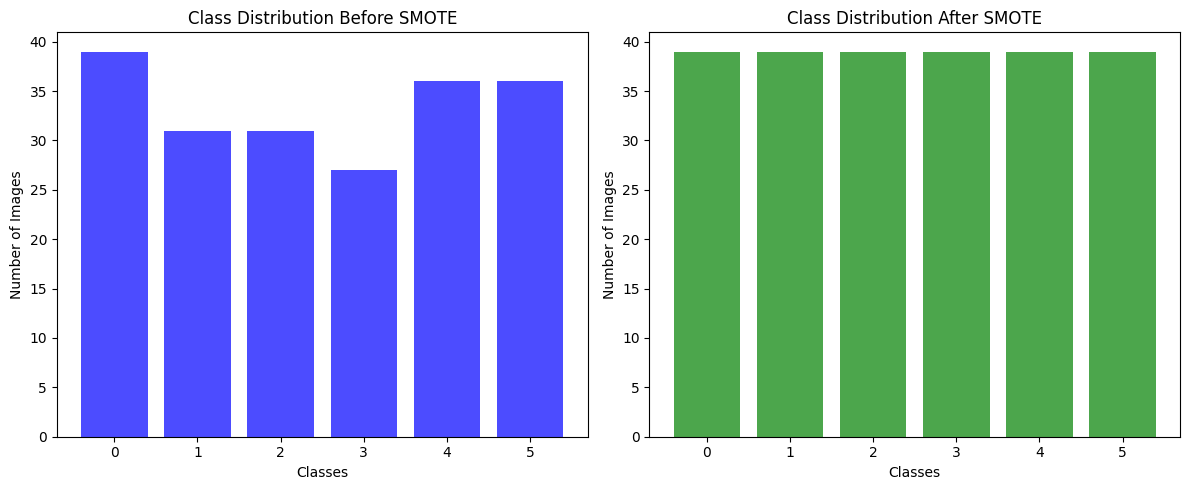

In [7]:
from collections import Counter

# Assuming 'X' contains features before SMOTE and 'y' contains labels before SMOTE
# If 'y' is not directly available, it must be extracted from dataset labels

# Count class distribution before SMOTE
class_counts_before = Counter(y)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count class distribution after SMOTE
class_counts_after = Counter(y_resampled)

# Extract class labels and counts for plotting
classes = sorted(class_counts_before.keys())  # Ensure classes are in order
counts_before = [class_counts_before[c] for c in classes]
counts_after = [class_counts_after[c] for c in classes]

# Create bar charts for class distributions before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].bar(classes, counts_before, color='b', alpha=0.7)
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Images")

# After SMOTE
axes[1].bar(classes, counts_after, color='g', alpha=0.7)
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()


In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Count images before SMOTE
class_counts_before = Counter(y)
print("Class Distribution Before SMOTE:", class_counts_before)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count images after SMOTE
class_counts_after = Counter(y_resampled)
print("Class Distribution After SMOTE:", class_counts_after)

# Find out how many new images were generated
new_images = {cls: class_counts_after[cls] - class_counts_before[cls] for cls in class_counts_before.keys()}
print("Number of New Images Generated by SMOTE:", new_images)


Class Distribution Before SMOTE: Counter({0: 39, 5: 36, 4: 36, 1: 31, 2: 31, 3: 27})
Class Distribution After SMOTE: Counter({1: 39, 5: 39, 4: 39, 2: 39, 0: 39, 3: 39})
Number of New Images Generated by SMOTE: {1: 8, 5: 3, 4: 3, 2: 8, 0: 0, 3: 12}


In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
import random


# Dataset paths
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)


Found 1920 images belonging to 6 classes.
Found 480 images belonging to 6 classes.
Found 237 images belonging to 6 classes.


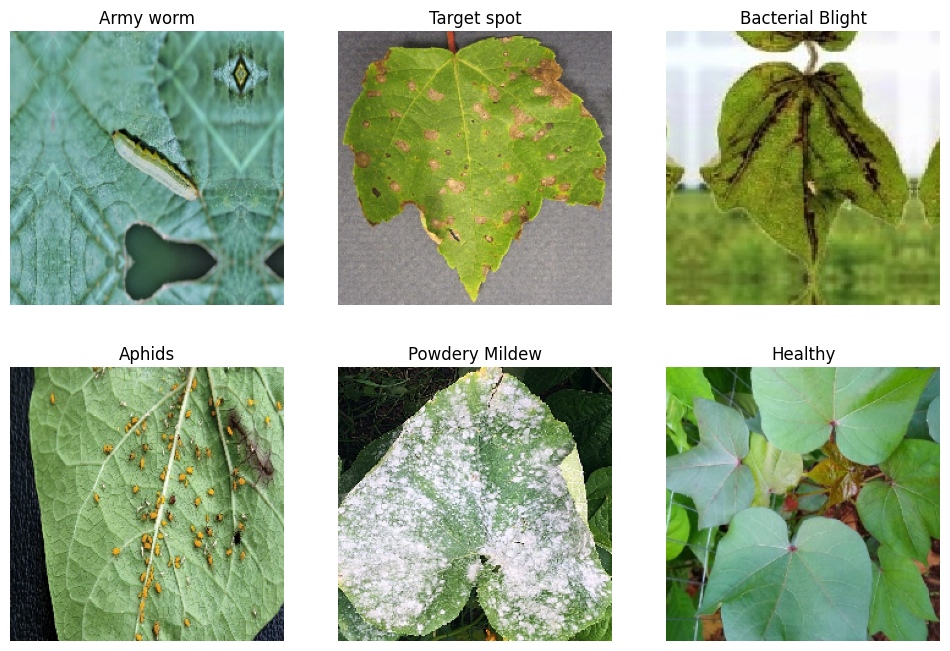

In [10]:
# Plot dataset images with class names
def plot_dataset_images(generator):
    class_names = list(generator.class_indices.keys())
    num_classes = len(class_names)
    plt.figure(figsize=(12, 8))
    class_counts = {class_name: 0 for class_name in class_names}
    max_images_per_class = 1  # Ensure all classes are displayed
    subplot_index = 1

    for images, labels in generator:
        for i in range(len(images)):
            label_idx = np.argmax(labels[i])
            class_name = class_names[label_idx]
            if class_counts[class_name] < max_images_per_class:
                plt.subplot(2, 3, subplot_index)
                plt.imshow(images[i])
                plt.title(class_name)
                plt.axis('off')
                class_counts[class_name] += 1
                subplot_index += 1
            if all(count >= max_images_per_class for count in class_counts.values()):
                plt.show()
                return

# Plot train dataset images showing all classes
plot_dataset_images(train_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


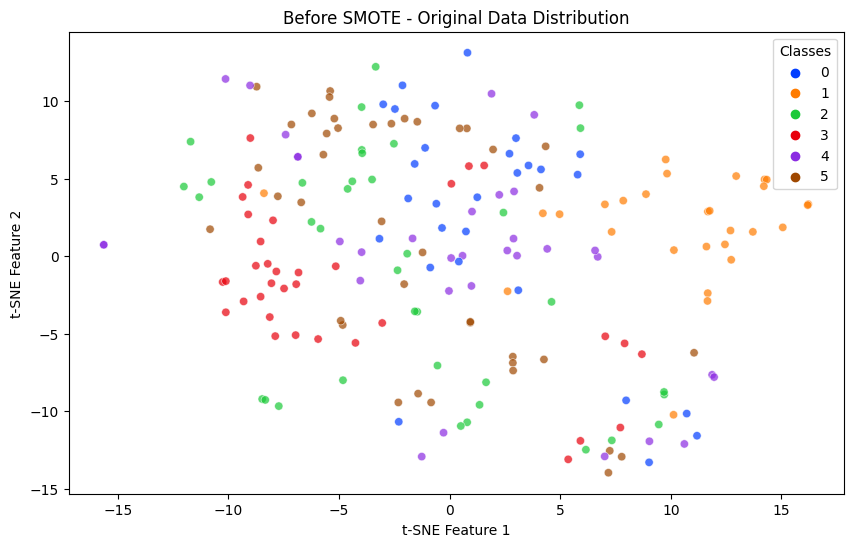

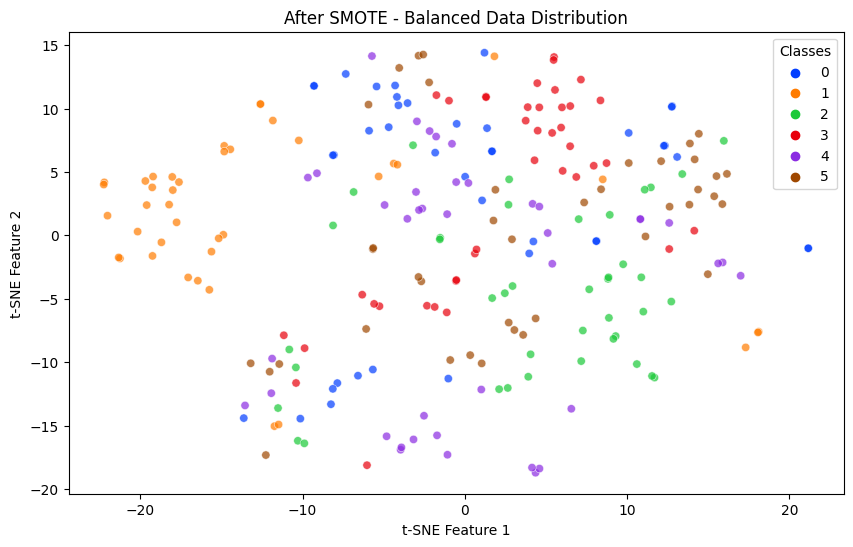

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder

# Load the pre-trained InceptionResNetV2 model without the top layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features using InceptionResNetV2
def extract_features_from_generator(generator, model, num_samples=100):
    features = []
    labels = []
    count = 0
    for images, lbls in generator:
        batch_features = model.predict(images)
        features.extend(batch_features)
        labels.extend(np.argmax(lbls, axis=1))
        count += len(images)
        if count >= num_samples:
            break
    return np.array(features[:num_samples]), np.array(labels[:num_samples])

# Extract features from train_generator
X, y = extract_features_from_generator(train_generator, base_model, num_samples=200)

# Use t-SNE to reduce features to 2D before SMOTE
tsne = TSNE(n_components=2, random_state=42)
X_tsne_before = tsne.fit_transform(X)

# Apply SMOTE for data balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Use t-SNE to reduce features to 2D after SMOTE
X_tsne_after = tsne.fit_transform(X_resampled)

# Plot Before SMOTE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_before[:, 0], y=X_tsne_before[:, 1], hue=y, palette='bright', alpha=0.7)
plt.title("Before SMOTE - Original Data Distribution")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Classes")
plt.show()

# Plot After SMOTE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_after[:, 0], y=X_tsne_after[:, 1], hue=y_resampled, palette='bright', alpha=0.7)
plt.title("After SMOTE - Balanced Data Distribution")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Classes")
plt.show()


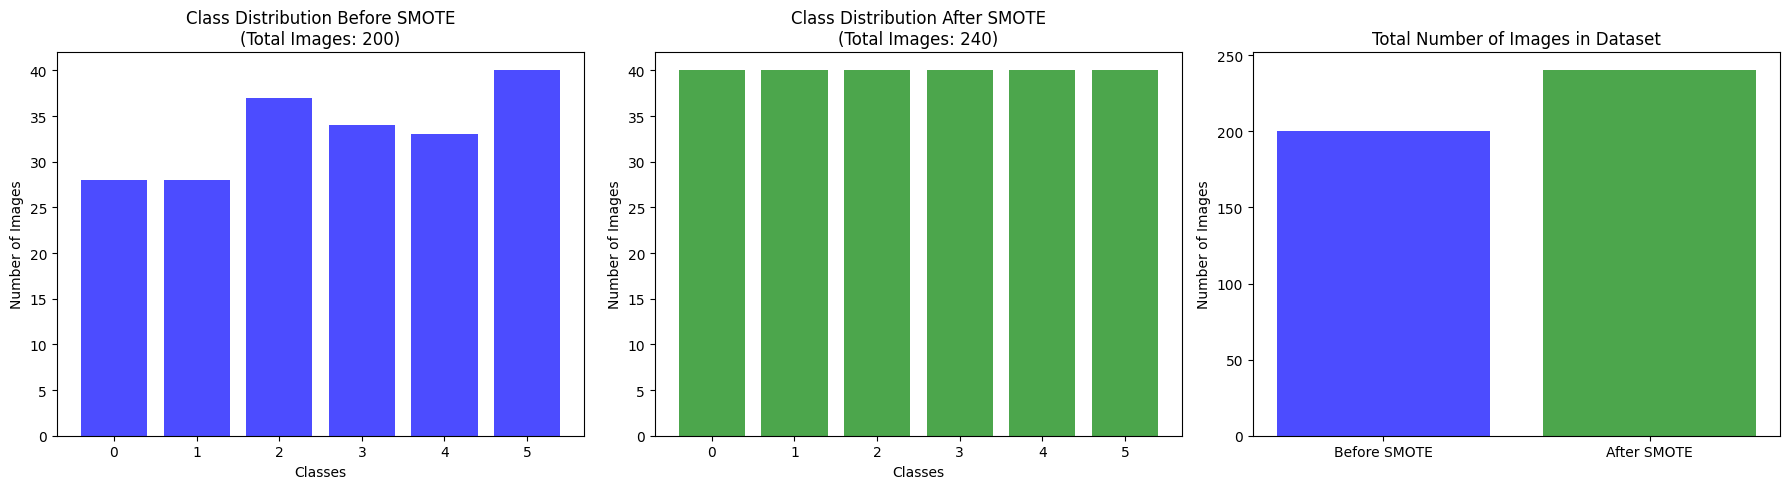

In [12]:
from collections import Counter

# Count class distribution before SMOTE
class_counts_before = Counter(y)

# Count class distribution after SMOTE
class_counts_after = Counter(y_resampled)

# Extract class labels and counts for plotting
classes = sorted(class_counts_before.keys())  # Ensure classes are in order
counts_before = [class_counts_before[c] for c in classes]
counts_after = [class_counts_after[c] for c in classes]

# Calculate total number of images before and after SMOTE
total_images_before = sum(counts_before)
total_images_after = sum(counts_after)

# Create bar charts for class distributions before and after SMOTE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Before SMOTE
axes[0].bar(classes, counts_before, color='b', alpha=0.7)
axes[0].set_title(f"Class Distribution Before SMOTE\n(Total Images: {total_images_before})")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Images")

# After SMOTE
axes[1].bar(classes, counts_after, color='g', alpha=0.7)
axes[1].set_title(f"Class Distribution After SMOTE\n(Total Images: {total_images_after})")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Images")

# Plot total number of images before and after SMOTE
axes[2].bar(["Before SMOTE", "After SMOTE"], [total_images_before, total_images_after], color=['b', 'g'], alpha=0.7)
axes[2].set_title("Total Number of Images in Dataset")
axes[2].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()


Found 2400 images belonging to 6 classes.
Found 237 images belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━

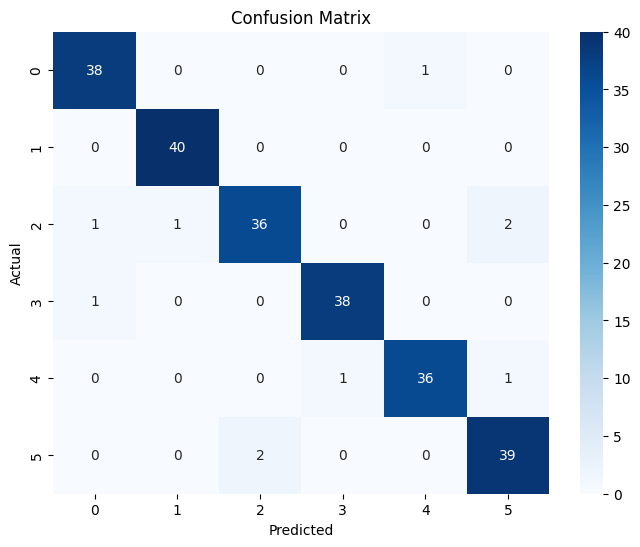

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.98      1.00      0.99        40
           2       0.95      0.90      0.92        40
           3       0.97      0.97      0.97        39
           4       0.97      0.95      0.96        38
           5       0.93      0.95      0.94        41

    accuracy                           0.96       237
   macro avg       0.96      0.96      0.96       237
weighted avg       0.96      0.96      0.96       237



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical


# Load dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

# Improved Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    zoom_range=0.3
)
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=True)
test_generator = datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=False)

# Feature Extraction with Two Models
def extract_features(generator, model, num_images):
    features, labels = [], []
    for images, lbls in generator:
        batch_features = model.predict(images)
        features.extend(batch_features)
        labels.extend(lbls)
        if len(features) >= num_images:
            break
    return np.array(features[:num_images]), np.array(labels[:num_images], dtype=int)

# Use an Ensemble of Feature Extractors
base_model1 = InceptionResNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))
base_model2 = EfficientNetB3(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))

feature_extractor1 = Model(inputs=base_model1.input, outputs=base_model1.output)
feature_extractor2 = Model(inputs=base_model2.input, outputs=base_model2.output)

# Extract features for train & test
X_train_features1, y_train_labels = extract_features(train_generator, feature_extractor1, train_generator.samples)
X_train_features2, _ = extract_features(train_generator, feature_extractor2, train_generator.samples)
X_test_features1, y_test_labels = extract_features(test_generator, feature_extractor1, 237)
X_test_features2, _ = extract_features(test_generator, feature_extractor2, 237)

# Concatenate Features from Both Extractors
X_train_features = np.concatenate([X_train_features1, X_train_features2], axis=1)
X_test_features = np.concatenate([X_test_features1, X_test_features2], axis=1)

# Apply SMOTE Only on Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_features, y_train_labels)

# Split training data into train-validation
x_train, x_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Focal Loss (to handle class imbalance)
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # y_true is already one-hot encoded, so we don't need K.one_hot()
        y_pred = K.clip(y_pred, 1e-8, 1.0 - 1e-8)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        loss = -alpha * K.pow(1 - p_t, gamma) * K.log(p_t)
        return K.mean(loss)
    return loss

# 🔥 **Build Model (Fixed Hyperparameters)**
final_model = Sequential([
    tf.keras.layers.Input(shape=(3072,)),  # Explicit input layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

# Define default best hyperparameters
best_hyperparams = {'learning_rate': 0.001}  # Add this line if tuning is removed

# Compile Model (Fixed Hyperparameters)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)

final_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Default learning rate
    loss=focal_loss(),
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), 
             tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')]
)

# Train the Model
history = final_model.fit(
    x_train, y_train, 
    epochs=50, 
    batch_size=32,
    validation_data=(x_val, y_val)
)

# Evaluate on Test Data
y_pred = np.argmax(final_model.predict(X_test_features), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))


In [14]:
train_precision = history.history.get('precision') or history.history.get('precision_1')
val_precision = history.history.get('val_precision') or history.history.get('val_precision_1')
train_recall = history.history.get('recall') or history.history.get('recall_1')
val_recall = history.history.get('val_recall') or history.history.get('val_recall_1')

train_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(train_precision, train_recall)]
val_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(val_precision, val_recall)]


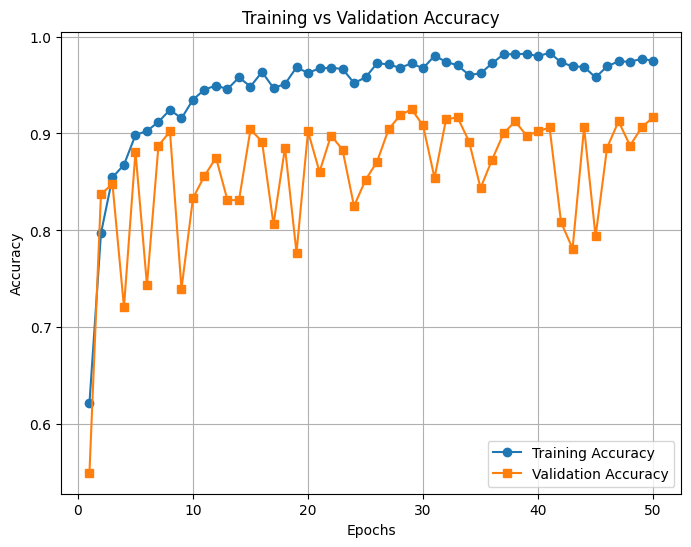

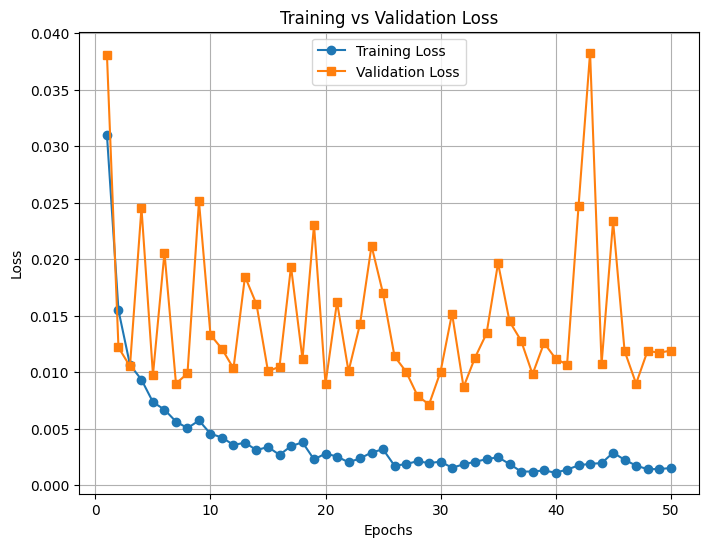

In [16]:
# Extract accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training and Validation Accuracy
epochs = range(1, len(train_accuracy) + 1)  # Define epoch range

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


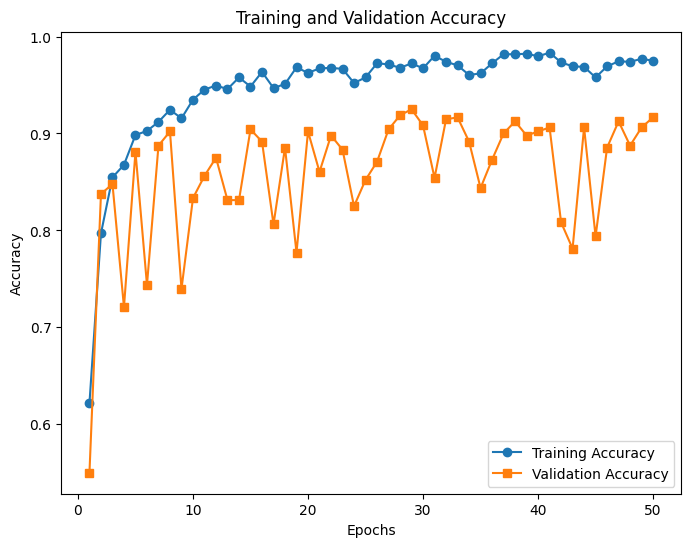

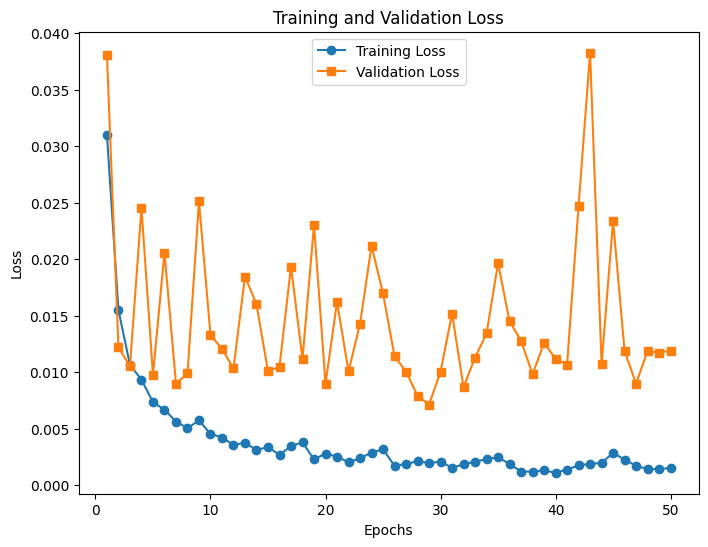

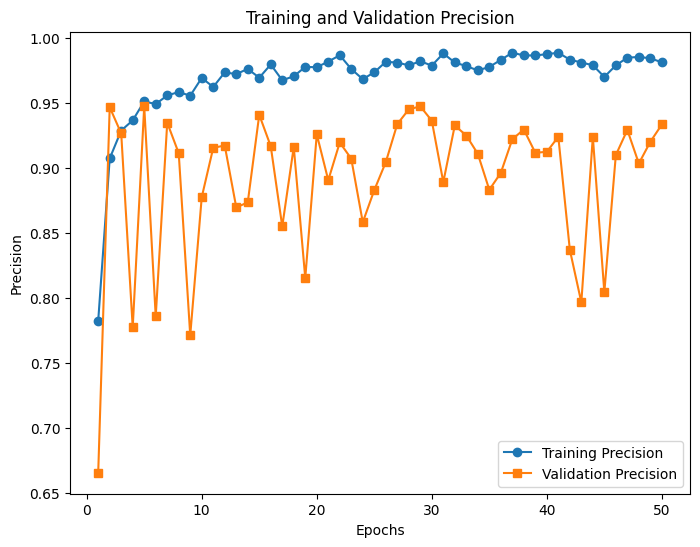

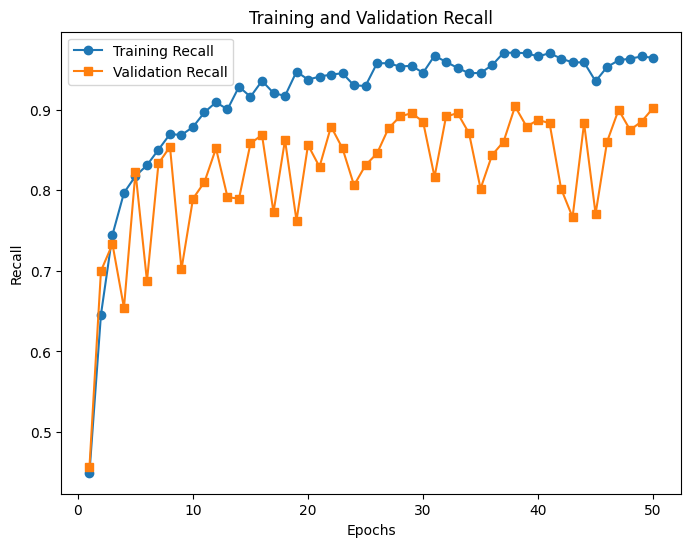

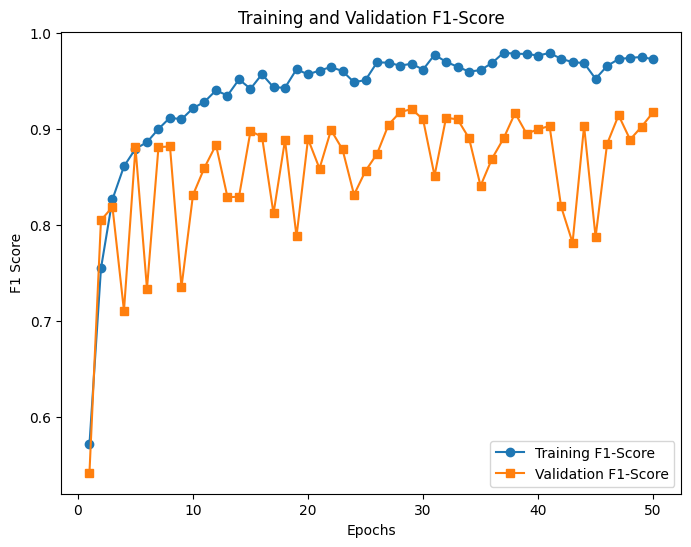

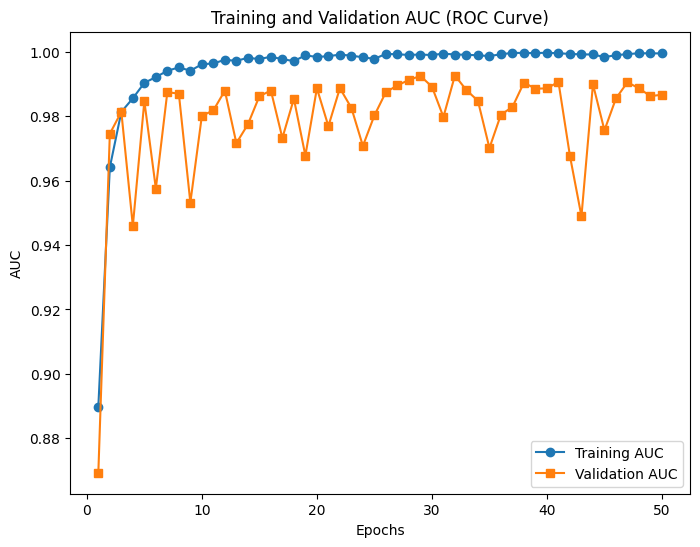

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_precision, label='Training Precision', marker='o')
plt.plot(epochs, val_precision, label='Validation Precision', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_recall, label='Training Recall', marker='o')
plt.plot(epochs, val_recall, label='Validation Recall', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_f1, label='Training F1-Score', marker='o')
plt.plot(epochs, val_f1, label='Validation F1-Score', marker='s')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1-Score')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['auc'], label='Training AUC', marker='o')
plt.plot(epochs, history.history['val_auc'], label='Validation AUC', marker='s')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC (ROC Curve)')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


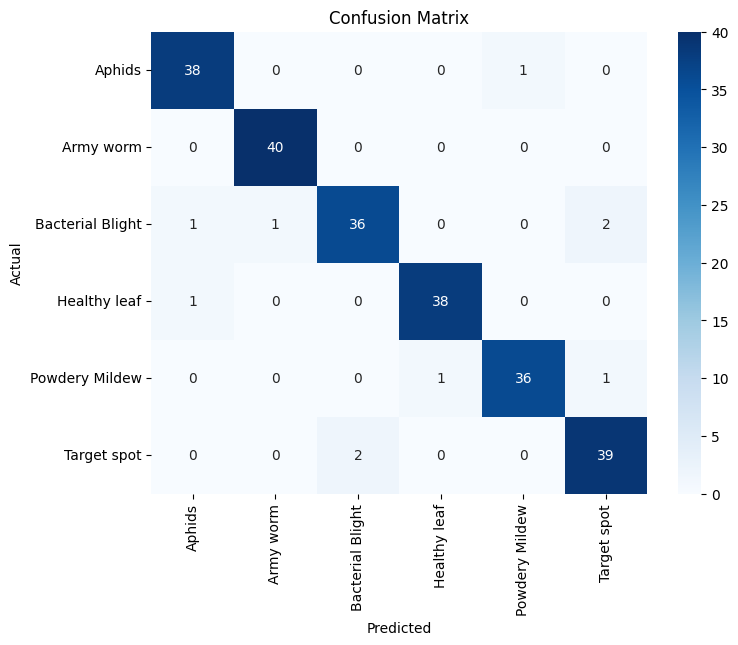

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ["Aphids", "Army worm", "Bacterial Blight", "Healthy leaf", "Powdery Mildew", "Target spot"]

# Generate predictions
y_pred = np.argmax(final_model.predict(X_test_features), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [3]:
from sklearn.metrics import classification_report

# Print classification report with class names
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Classification Report:
                  precision    recall  f1-score   support

          Aphids       0.95      0.97      0.96        39
       Army worm       0.98      1.00      0.99        40
Bacterial Blight       0.95      0.90      0.92        40
    Healthy leaf       0.97      0.97      0.97        39
  Powdery Mildew       0.97      0.95      0.96        38
     Target spot       0.93      0.95      0.94        41

        accuracy                           0.96       237
       macro avg       0.96      0.96      0.96       237
    weighted avg       0.96      0.96      0.96       237



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Actual Class: 0


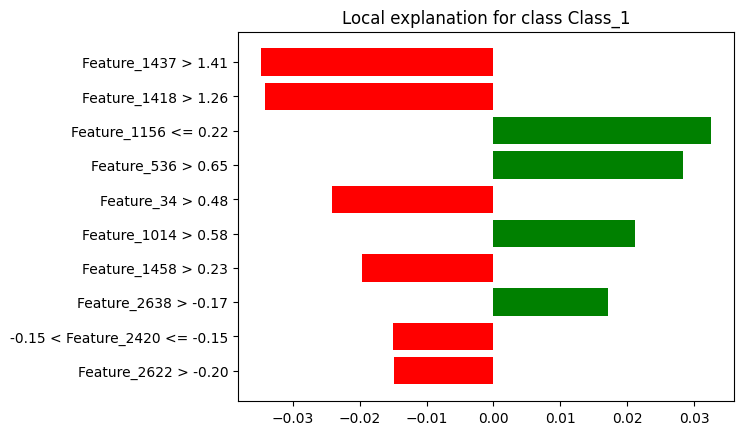

In [4]:
import lime
import lime.lime_tabular
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train,    # Use training data
    feature_names=[f'Feature_{i}' for i in range(x_train.shape[1])],  # Generic feature names
    class_names=['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],  # Update based on dataset
    mode="classification"
)

# Select a random test instance
random_index = random.randint(0, X_test_features.shape[0] - 1)
test_instance = X_test_features[random_index]
true_label = y_test_labels[random_index]

# Define a wrapper function to make predictions in the correct format for LIME
def predict_fn(features):
    return final_model.predict(features)

# Get LIME explanation for the test instance
exp = explainer.explain_instance(
    data_row=test_instance, 
    predict_fn=predict_fn,
    num_features=10  # Number of features to explain
)
# Display explanation in text format
print(f"Actual Class: {true_label}")
exp.show_in_notebook()

# Plot feature importance
exp.as_pyplot_figure()
plt.show()
